In [1]:
from pathlib import Path
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import gzip, pickle, chardet
from itertools import islice
from memory_profiler import profile
import torch

In [2]:
torch.__version__

'2.0.0'

In [151]:
%matplotlib inline
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [375]:
# !pip install chardet
# !pip install memory_profiler
!pip install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/pip-install-f6nu76g7/numba_2d59cf8c089e4d10b5a1e86467b9ba7a/setup.py", line 51, in <module>
          _guard_py_ver()
        File "/private/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/pip-install-f6nu76g7/numba_2d59cf8c089e4d10b5a1e86467b9ba7a/setup.py", line 48, in _guard_py_ver
          raise RuntimeError(msg.format(cur_py, min_py, max_py))
      RuntimeError: Cannot install on Python version 3.11.0; only versions >=3.7,<3.11 are supported.
      [end of output]
  
  note: This error originates from 

In [21]:
MNIST_URL = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'

In [27]:
data_folder = Path('data')

In [28]:
data_folder.mkdir(exist_ok=True)

In [29]:
file_path = data_folder/'mnist.pkl.gz'

In [40]:
if not file_path.exists():
    urlretrieve(MNIST_URL, file_path)

In [44]:
file_path.exists()

True

In [65]:
data = None
with gzip.open(file_path, 'rb') as f:
#     %time print('encoding type: ', chardet.detect(f.read()))
    data = pickle.load(f, encoding='latin1')

In [78]:
((x_train, y_train), (x_test, y_test), _) = data

In [83]:
lst = list(x_train[0])

In [85]:
len(lst)

784

In [111]:
def chunks(lst, sz):
    chnklst = []
    for i in range(0, len(lst), sz):
        chnklst.append(lst[i:i+sz])
    return chnklst

In [112]:
%time chnklst = chunks(lst, 28)

CPU times: user 50 µs, sys: 105 µs, total: 155 µs
Wall time: 159 µs


In [152]:
%memit chnklst = chunks(lst, 28)

peak memory: 199.68 MiB, increment: 0.25 MiB


In [117]:
len(chnklst), len(chnklst[0])

(28, 28)

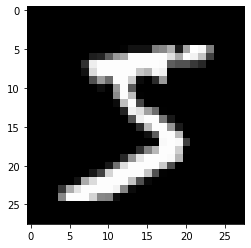

In [123]:
plt.imshow(chnklst, cmap='gray')

In [125]:
def chunks_with_yield(lst, sz):
    for i in range(0, len(lst), sz):
        yield lst[i:i+sz]

In [138]:
%time chnklst2 = list(chunks_with_yield(lst, 28))

CPU times: user 49 µs, sys: 144 µs, total: 193 µs
Wall time: 207 µs


In [153]:
%memit chnklst2 = list(chunks_with_yield(lst, 28))

peak memory: 194.51 MiB, increment: 0.02 MiB


In [140]:
len(chnklst2), len(chnklst2[0])

(28, 28)

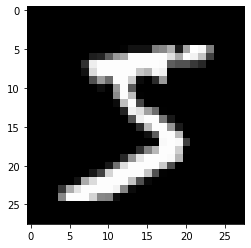

In [141]:
plt.imshow(chnklst2, cmap='gray')

In [170]:
islice??

In [161]:
%memit lst = [ele for ele in range(1000000)]

peak memory: 231.00 MiB, increment: 35.64 MiB


In [164]:
%memit lst

peak memory: 240.09 MiB, increment: 0.02 MiB


In [171]:
nums_squared_gc = (i ** 2 for i in range(10000))

In [178]:
next(nums_squared_gc)

16

In [179]:
import cProfile

In [185]:
cProfile.run('sum([i * 2 for i in range(1000000)])')

         5 function calls in 0.175 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.158    0.158    0.158    0.158 <string>:1(<listcomp>)
        1    0.009    0.009    0.175    0.175 <string>:1(<module>)
        1    0.000    0.000    0.175    0.175 {built-in method builtins.exec}
        1    0.009    0.009    0.009    0.009 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [186]:
cProfile.run('sum((i * 2 for i in range(1000000)))')

         1000005 function calls in 0.229 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1000001    0.151    0.000    0.151    0.000 <string>:1(<genexpr>)
        1    0.000    0.000    0.228    0.228 <string>:1(<module>)
        1    0.001    0.001    0.229    0.229 {built-in method builtins.exec}
        1    0.077    0.077    0.228    0.228 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [187]:
0.229/0.175

1.3085714285714287

In [189]:
iter?

In [190]:
x = [ele for ele in range(1000)]

In [191]:
y = iter(x)

In [202]:
z = (ele for ele in range(10000))

In [192]:
type(y)

list_iterator

In [200]:
next(y)

4

In [201]:
%memit y

peak memory: 252.98 MiB, increment: 0.06 MiB


In [204]:
%memit z

peak memory: 253.02 MiB, increment: 0.02 MiB


In [208]:
lst = x_train[0]
len(lst)

784

In [221]:
lst_itr = iter(lst)
chunklst3  = list(iter(lambda: list(islice(lst_itr, 28)), []))

In [223]:
len(chunklst3), len(chunklst3[0])

(28, 28)

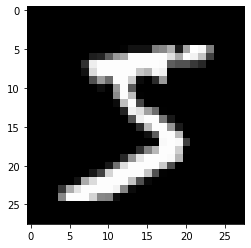

In [225]:
plt.imshow(chunklst3, cmap='gray')

In [228]:
class Matrix():
    def __init__(self, x):
        self.x = x
    
    def __getitem__(self, idx):
        return self.x[idx[0]][idx[1]]

In [232]:
chunklst3_mat = Matrix(chunklst3)

In [237]:
chunklst3_mat[24,5]

0.98828125

In [240]:
x_train,y_train,x_dev,y_dev = map(torch.tensor, (x_train, y_train, x_test, y_test))

In [241]:
x_train.shape

torch.Size([50000, 784])

In [243]:
x_train[0].shape

torch.Size([784])

In [244]:
x_train.dtype

torch.float32

In [245]:
x_train.type()

'torch.FloatTensor'

In [246]:
chunklst4 = x_train[0].reshape(-1, 28, 28)

In [247]:
chunklst4.shape

torch.Size([1, 28, 28])

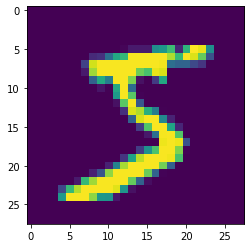

In [250]:
plt.imshow(chunklst4[0])

In [252]:
import random

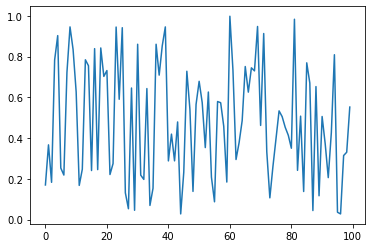

In [259]:
plt.plot([random.random() for _ in range(100)])

(array([ 97., 112.,  95., 100.,  92.,  97.,  95.,  94., 110., 108.]),
 array([0.00117792, 0.10103385, 0.20088978, 0.30074571, 0.40060164,
        0.50045757, 0.6003135 , 0.70016943, 0.80002536, 0.89988129,
        0.99973722]),
 <BarContainer object of 10 artists>)

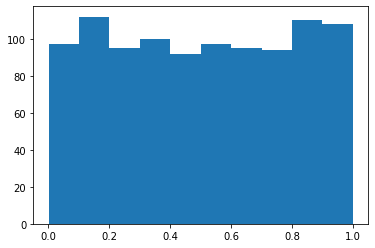

In [264]:
plt.hist([random.random() for _ in range(1000)])

In [265]:
random.random??

In [266]:
[random.random() for _ in range(100)]

[0.23312284638918135,
 0.6600825669494873,
 0.5559688062888731,
 0.9393223872510965,
 0.997069113766209,
 0.9714371556726054,
 0.7979060101290658,
 0.6629985036926377,
 0.007034324704647266,
 0.4604418170165272,
 0.4367622378615764,
 0.3229516309516832,
 0.5383612539230914,
 0.8243091045034872,
 0.24013412090178465,
 0.3455729964983424,
 0.6079545462485493,
 0.8533317537069128,
 0.45888556361342037,
 0.6760229327990728,
 0.6552822039633079,
 0.16372087489333542,
 0.30821510321298884,
 0.3411020029491336,
 0.2284972693758235,
 0.9189732861588299,
 0.5188445223222962,
 0.95425706864202,
 0.34257280292191405,
 0.6223847348893689,
 0.7053108988479604,
 0.16547508789617216,
 0.058448613968726026,
 0.8716886377687983,
 0.6718017717556175,
 0.2930057082189871,
 0.981469057250725,
 0.9887329341668547,
 0.19981334445496002,
 0.8017015329716433,
 0.38193925681764995,
 0.05686705418930804,
 0.5829386725915756,
 0.4232424077625232,
 0.15928277653922773,
 0.9759090668765136,
 0.2287409148406263,
 0

In [269]:
torch.randn??

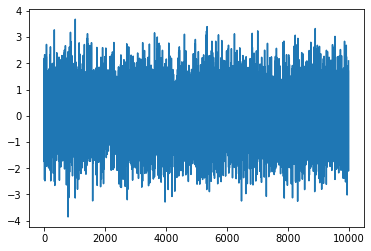

In [276]:
plt.plot(list(torch.randn((1, 10000))[0]))

(array([  11.,   83.,  439., 1518., 2600., 2826., 1764.,  612.,  131.,
          16.]),
 array([-3.92053127, -3.15524149, -2.38995171, -1.62466204, -0.85937232,
        -0.09408259,  0.67120713,  1.43649685,  2.20178652,  2.9670763 ,
         3.73236609]),
 <BarContainer object of 10 artists>)

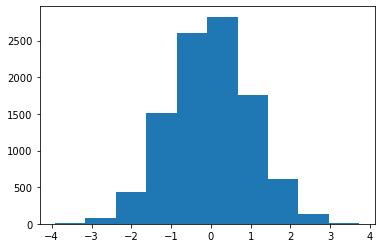

In [277]:
plt.hist(list(torch.randn((1, 10000))[0]))

(array([1000., 1026.,  979.,  976.,  996., 1010., 1029., 1017.,  993.,
         974.]),
 array([8.42809677e-05, 1.00074515e-01, 2.00064749e-01, 3.00054997e-01,
        4.00045216e-01, 5.00035465e-01, 6.00025713e-01, 7.00015962e-01,
        8.00006151e-01, 8.99996400e-01, 9.99986649e-01]),
 <BarContainer object of 10 artists>)

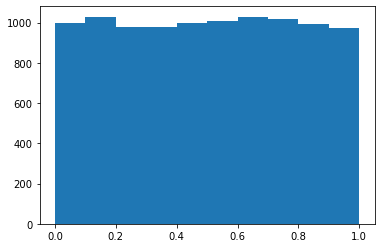

In [280]:
plt.hist(list(torch.rand((1, 10000))[0]))

In [286]:
dir(torch.random)

['Generator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_fork_rng_warned_already',
 'contextlib',
 'default_generator',
 'fork_rng',
 'get_rng_state',
 'initial_seed',
 'manual_seed',
 'seed',
 'set_rng_state',
 'torch',
 'warnings']

In [329]:
torch.random.manual_seed(1)

In [347]:
torch.manual_seed(1)
[torch.rand((1, 1)) for _ in range(10)]

[tensor([[0.7576]]),
 tensor([[0.2793]]),
 tensor([[0.4031]]),
 tensor([[0.7347]]),
 tensor([[0.0293]]),
 tensor([[0.7999]]),
 tensor([[0.3971]]),
 tensor([[0.7544]]),
 tensor([[0.5695]]),
 tensor([[0.4388]])]

In [348]:
torch.manual_seed(1)
[torch.rand((1, 1)) for _ in range(10)]

[tensor([[0.7576]]),
 tensor([[0.2793]]),
 tensor([[0.4031]]),
 tensor([[0.7347]]),
 tensor([[0.0293]]),
 tensor([[0.7999]]),
 tensor([[0.3971]]),
 tensor([[0.7544]]),
 tensor([[0.5695]]),
 tensor([[0.4388]])]

In [463]:
m1 = x_test[:5]
m1.shape

(5, 784)

In [351]:
torch.manual_seed(1)
m2 = torch.randn(m1.shape[1], 10)
m2.shape

torch.Size([784, 10])

In [353]:
# (5, 784) * (784, 10) => (5, 10)
t1 = torch.zeros(5, 10)
t1.shape

torch.Size([5, 10])

In [354]:
ar, ac = m1.shape
br, bc = m2.shape

In [355]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i, j] += m1[i,k] * m2[k, j]

In [357]:
t1.shape

torch.Size([5, 10])

In [358]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [369]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [371]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i, j] += m1[i,k] * m2[k, j]
    return c

In [372]:
%time _ = matmul(m1, m2)

CPU times: user 818 ms, sys: 4.33 ms, total: 823 ms
Wall time: 821 ms


In [373]:
_

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [374]:
# number of operations
ar*bc*ac

39200

#### numba

In [380]:
# from numba import njit

In [379]:
# !pip install numba==0.55.2 

In [388]:
import fastcore.test as ftest

In [397]:
ftest.test_close(torch.zeros(5, 10), matmul(m1, m2))

AssertionError: close:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [405]:
ftest.test_close(t1, matmul(m1, m2))

In [404]:
torch.allclose(t1, matmul(m1, m2))

True

In [406]:
torch.allclose(torch.zeros(5, 10), matmul(m1, m2))

False

In [411]:
def test_func(*args, **kwargs):
    print(args)
    print(kwargs)

In [414]:
# test_func('hello', 'arun', a='arun', 'john')

In [422]:
a = torch.tensor([10., 6, -4])
b = torch.tensor([2., 8, 7])

In [423]:
a + b

tensor([12., 14.,  3.])

In [424]:
(a<b).float().mean()

tensor(0.67)

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

In [425]:
m = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

In [431]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [432]:
m*m

tensor([[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]])

In [434]:
sf = (m*m).sum()

In [435]:
sf

tensor(285)

In [436]:
sf.sqrt()

tensor(16.88)

In [481]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] += torch.dot(a[i,:], b[:,j])
    return c

In [442]:
m[1:,]

tensor([[4, 5, 6],
        [7, 8, 9]])

In [441]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [453]:
m[:,2]

tensor([3, 6, 9])

In [454]:
m[2:,]

tensor([[7, 8, 9]])

In [458]:
m1, m2 = map(torch.tensor, (m1, m2))

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_72407/3119844781.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  m1, m2 = map(torch.tensor, (m1, m2))


In [471]:
m1 = x_test[:5]
m1.shape

torch.manual_seed(1)
m2 = torch.randn(m1.shape[1], 10)
m2.shape

torch.Size([784, 10])

In [476]:
m1, m2 = map(torch.tensor, (m1, m2))

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_72407/3119844781.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  m1, m2 = map(torch.tensor, (m1, m2))


In [482]:
matmul(m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [483]:
torch.allclose(t1, matmul(m1, m2))

True

#### broadcasting

In [484]:
# basically process about how array with different shapes go through arithmetic operations

In [485]:
a = torch.tensor([10, 6, -4])

In [486]:
a > 0

tensor([ True,  True, False])

In [487]:
a + 1

tensor([11,  7, -3])

In [488]:
2 * a

tensor([20, 12, -8])

In [489]:
a * 2

tensor([20, 12, -8])

In [490]:
1 + a

tensor([11,  7, -3])

In [491]:
m 

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [492]:
m > 0

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [493]:
0 < m

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [494]:
m + 1

tensor([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10]])

In [495]:
1 + m

tensor([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10]])

In [496]:
2*m

tensor([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18]])

In [497]:
m*2

tensor([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18]])

In [498]:
# broadcasting vector to a matrix

In [503]:
c = torch.tensor([1, 2, 3]);c

tensor([1, 2, 3])

In [500]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [505]:
m + c.T

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_72407/1498395764.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3575.)
  m + c.T


tensor([[ 2,  4,  6],
        [ 5,  7,  9],
        [ 8, 10, 12]])

In [504]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [507]:
m.shape, c.T.shape

(torch.Size([3, 3]), torch.Size([3]))

In [508]:
c.shape, c.T.shape

(torch.Size([3]), torch.Size([3]))

In [509]:
c, c.T

(tensor([1, 2, 3]), tensor([1, 2, 3]))

In [511]:
c.reshape((1, 3)).shape

torch.Size([1, 3])

In [515]:
m + c

tensor([[ 2,  4,  6],
        [ 5,  7,  9],
        [ 8, 10, 12]])

In [516]:
c + m

tensor([[ 2,  4,  6],
        [ 5,  7,  9],
        [ 8, 10, 12]])

In [518]:
c.expand_as(m)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [519]:
m + c.expand_as(m)

tensor([[ 2,  4,  6],
        [ 5,  7,  9],
        [ 8, 10, 12]])

In [520]:
t = c.expand_as(m)

In [526]:
t.untyped_storage()

 1
 0
 0
 0
 0
 0
 0
 0
 2
 0
 0
 0
 0
 0
 0
 0
 3
 0
 0
 0
 0
 0
 0
 0
[torch.storage.UntypedStorage(device=cpu) of size 24]

In [527]:
c.untyped_storage()

 1
 0
 0
 0
 0
 0
 0
 0
 2
 0
 0
 0
 0
 0
 0
 0
 3
 0
 0
 0
 0
 0
 0
 0
[torch.storage.UntypedStorage(device=cpu) of size 24]

In [528]:
m.untyped_storage()

 1
 0
 0
 0
 0
 0
 0
 0
 2
 0
 0
 0
 0
 0
 0
 0
 3
 0
 0
 0
 0
 0
 0
 0
 4
 0
 0
 0
 0
 0
 0
 0
 5
 0
 0
 0
 0
 0
 0
 0
 6
 0
 0
 0
 0
 0
 0
 0
 7
 0
 0
 0
 0
 0
 0
 0
 8
 0
 0
 0
 0
 0
 0
 0
 9
 0
 0
 0
 0
 0
 0
 0
[torch.storage.UntypedStorage(device=cpu) of size 72]

In [525]:
3*8

24

In [530]:
c.shape

torch.Size([3])

In [531]:
72/24

3.0

In [548]:
torch.tensor([[4], [3]]).untyped_storage()

 4
 0
 0
 0
 0
 0
 0
 0
 3
 0
 0
 0
 0
 0
 0
 0
[torch.storage.UntypedStorage(device=cpu) of size 16]

In [557]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [555]:
m.stride(), m.shape

((3, 1), torch.Size([3, 3]))

In [556]:
c.stride(), c.shape

((1,), torch.Size([3]))

In [561]:
t = torch.randn(2, 3, 4)

In [562]:
t

tensor([[[ 1.26, -0.60, -0.94,  0.12],
         [ 3.16,  0.61,  1.24, -0.27],
         [-1.57,  0.92,  0.34, -0.64]],

        [[ 0.12, -1.24,  0.35,  0.95],
         [-0.54, -0.29,  1.76,  0.52],
         [ 0.69, -0.85,  0.19,  1.14]]])

In [563]:
t.shape

torch.Size([2, 3, 4])

In [564]:
t.stride()

(12, 4, 1)

In [565]:
t.shape

torch.Size([2, 3, 4])

In [567]:
c.shape

torch.Size([3])

In [576]:
c.unsqueeze(1)

tensor([[1],
        [2],
        [3]])

In [573]:
c.unsqueeze(0)

tensor([[1, 2, 3]])

In [574]:
c.unsqueeze(0).shape

torch.Size([1, 3])

In [575]:
c.unsqueeze(1).shape

torch.Size([3, 1])

In [578]:
c[None, :].shape

torch.Size([1, 3])

In [579]:
c[:,None]

tensor([[1],
        [2],
        [3]])

In [583]:
c[None].shape

torch.Size([1, 3])

In [584]:
 c[...,None].shape

torch.Size([3, 1])

In [590]:
c[None,:]

tensor([[1, 2, 3]])

In [591]:
c[:,None]

tensor([[1],
        [2],
        [3]])

In [608]:
x = torch.randn(2,2)
x

tensor([[ 0.59, -0.05],
        [ 0.80, -0.31]])

In [609]:
y = torch.randn(2,3,5)
y

tensor([[[ 0.91, -0.19,  1.66,  1.10, -0.43],
         [-0.12,  0.35,  0.51,  0.07,  0.37],
         [ 1.60,  0.92,  0.55, -0.88,  0.26]],

        [[-0.39,  0.45, -0.38, -0.62,  0.96],
         [ 1.77,  0.43, -0.41, -2.52, -1.36],
         [ 0.11,  0.53,  0.88,  0.05,  0.91]]])

In [610]:
y.expand_as(x)

RuntimeError: expand(torch.FloatTensor{[2, 3, 5]}, size=[2, 2]): the number of sizes provided (2) must be greater or equal to the number of dimensions in the tensor (3)

In [611]:
y*x

RuntimeError: The size of tensor a (5) must match the size of tensor b (2) at non-singleton dimension 2

In [620]:
torch.zeros((1)).shape

torch.Size([1])

In [633]:
x=torch.empty((1,))
x, x.shape

(tensor([    0.00]), torch.Size([1]))

In [635]:
y=torch.empty(2,2)
y, y.shape

(tensor([[     inf,     0.00],
         [    0.00,     0.00]]),
 torch.Size([2, 2]))

In [636]:
x + y

tensor([[     inf,     0.00],
        [    0.00,     0.00]])

In [640]:
torch.empty(3,1,1)

tensor([[[     0.00]],

        [[     0.00]],

        [[-31013545689727723634688.00]]])